# Logistic Regression

- It's a classification technique based on the linear combination between X variables.
- Also called _logit_.

ex: $f(X) = \alpha + b_1x_1 + b_2x_2 +\dots + b_nx_n$.

## Sigmoid Function
- Sigmoid is a special function used in logistic regression
- Logistic regression's goal is to find $p($**x**$)$ which the **y** = $p(x_i)$ stay closest to the real values $y_i$ for each sample $i = 1, 2, \dots, n$
- Here, we are going to deal with binary classification (at the first moment)
- The outputs should be only $0$ or $1$. 


## Linear combination **x** Sigmoid function

- Logistic regression determines the best values for bias $\alpha$ and weights $b_1, b_2, \dots, b_n$
- The function $p($**x**$)$, then, should ne closer to the real value
- _fitting_ is the optimization process to find the best hyerparameters

In this case, the input **x** to the Sigmoid function ($p$) is the output from the linear combination $f(X) = \alpha + b_1x_1 + b_2x_2 +\dots + b_nx_n$.

## How to tune the bias and the weights?

- Max (_log-likelihood_ ) is used to find the best weights
    - This method is called _maximum likelihood estimation_ - MLE which is represented by:

\begin{equation}
MLE = \sum_{i=1}^n(y_i log(p(x_i)) + (1 − y_i) log(1 − p(x_i))).
\end{equation}

- `Scikit-learn` has great mathemathical ways to maximize the hyperparameters showed above:
   - solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, 
   - default='lbfgs'

   - Algorithm to use in the optimization problem.

       - For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones.
      - For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.
      - 'newton-cg', 'lbfgs', 'sag' and 'saga' handle L2 or no penalty
      - 'liblinear' and 'saga' also handle L1 penalty
      - 'saga' also supports 'elasticnet' penalty
      - 'liblinear' does not support setting ``penalty='none'``

## Implementation:
# 1) Binary classification with one input variable:

In [1]:
# Importing the necessary libs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Generating random input values
x = np.arange(10) 
print(x)
x.shape      #Note the shape here, we need to reshape to use this array in the LogisticRegression instance

[0 1 2 3 4 5 6 7 8 9]


(10,)

In [4]:
x = x.reshape(-1, 1)       #after this reshaping we won't get any error message

# Generating the classes [0, 1] for each sample
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(f'x = {x}')
print(f'y = {y}')

x = [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y = [0 0 0 0 1 1 1 1 1 1]


In [7]:
# Instancing the model LogisticRegression

# solver: used to optimize the parameters
#    - liblinear: best option for SMALL and BINARY datasets.
#    - random_state = x, no matter what number. Just to make sure it will always be the same result
model = LogisticRegression(solver='liblinear', random_state=0)

# Training the model with our data
model.fit(x, y)

# Extracting information from the model
print(f'classes = {model.classes_}')
print(f'bias = {model.intercept_}')
print(f'weights = {model.coef_}')

classes = [0 1]
bias = [-1.04608067]
weights = [[0.51491375]]


In [16]:
# Evaluating the model

# Let's look at the probabilities of each class
probabilities = model.predict_proba(x)
estimated_class = model.predict(x)

print(f'probabilities = \n{probabilities}\n')
print(f'estimated_class = \n {estimated_class}\n')
print(f'real_class = \n {y}')

probabilities = 
[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]

estimated_class = 
 [0 0 0 1 1 1 1 1 1 1]

real_class = 
 [0 0 0 0 1 1 1 1 1 1]


## If we compare the probabilities with the predicted values..
1) [0.74002157 - 0.259978 ] = [class 0 - class 1]   --->  class 0 has higher probability of beeing the right class
3) [0.5040632 - 0.4959368 ]  = [class 0 - class 1]   --->  the values are really close.

- so, we have a probabilty associated with the choice of the class, and depending on the matter of the problem, we may need that value to make confident decisions.

#### Example: 
   - if we are predicting if the person has cancer, based on her exams, the doctor should say that the pacient is really with cancer if the chance is almost 50/50%? Well, maybe he will think about doing the exam again checking other indicators before saying that to the pacient.
   - on the other hand, if the probability is 95% of the pacient having cancer, the doctor should be alert about it and make an investigation into the pacient's medical record to confirm it.
   

In [14]:
# Accuracy is another important metric to evaluate the model
# - values are between 0 and 1, it's based on the ( correct answers / total )  

print('Having 10 samples, the model correctly predicted 9, so the accuracy is:')
model.score(x, y)

Having 10 samples, the model correctly predicted 9, so the accuracy is:


0.9

In [18]:
# Another way of accessing the accuracy metric:
from sklearn.metrics import accuracy_score
accuracy_score(y, estimated_class)

0.9

## Confusion Matrix

- With the confusion matrix we can retrieve more detailed information from the classification model
- We look at the correct answers, using 4 new metrics:

    - (True negatives - **TN**): (zeros) correctly estimated
    - (True positives - **TP**): (1's) correctly estimated
    - (False negatives - **FN**): (zeros) wrongly estimated
    - (False positives - **FP**): (1's) wrongly estimated
![confusion matrix](https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png)

In [19]:
cm = confusion_matrix(y, estimated_class)
print('CM = ')
print(cm)

CM = 
[[3 1]
 [0 6]]


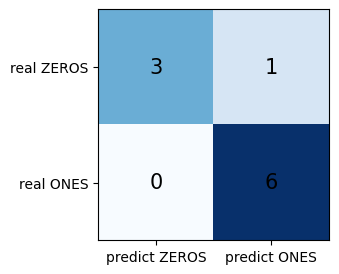

In [22]:
# plotting the confusion matrix
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predict ZEROS', 'predict ONES'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('real ZEROS', 'real ONES'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center',  size=15)
plt.show()

In [24]:
# getting a detailed report from the classification
print(classification_report(y, estimated_class))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



- **Precision** = TP/TP+FP or TN/TN+FN
- **Recall** = TP/TP+FN or TN/TN+FP
- **support** -> number of samples
- **F1-score, Macro AVG e Weighted AVG** -> similar o accuracy, but with weights

# Optimizing the model
 - changing hyperparameters
 

In [35]:
# increasing c, a regularization parameter 
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x, y)

print('bias = ',model.intercept_, '\n')
print('weights = ',model.coef_, '\n')
print('probabilities = \n\033[31m',model.predict_proba(x), '\033[m\n')
print('Estimated classes = \033[31m',model.predict(x), '\033[m\n')
print('Real classes =      \033[32m',y, '\033[m')

bias =  [-3.51335372] 

weights =  [[1.12066084]] 

probabilities = 
 [[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]] 

Estimated classes =  [0 0 0 0 1 1 1 1 1 1] 

Real classes =       [0 0 0 0 1 1 1 1 1 1] 


In [40]:
print('Accuracy = ', model.score(x, y))
print('\nConfusion matrix = ')
print( confusion_matrix(y, model.predict(x)))
print('\nClassification Report:\n', classification_report(y, model.predict(x)))

Accuracy =  1.0

Confusion matrix = 
[[4 0]
 [0 6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# 2) Changing the output class

In [41]:
# Changing only the second class of y
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Passo 3: Criando e treinando o modelo
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Passo 4: avaliando o modelo
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [46]:
print('bias:', model.intercept_)
print('weights:', model.coef_, end='\n\n')
print('probabilities:\033[31m', p_pred, sep='\n', end='\n\n')
print('\033[mestimated classes:\033[31m', y_pred, end='\n\n')
print('\033[mreal classes:     \033[32m', y, end='\n\n')
print('\033[maccuracy:', score_, end='\n\n')
print('confusion matrix:', conf_m, sep='\n', end='\n\n')
print('Report:', report, sep='\n')

bias: [-1.51632619]
weights: [[0.703457]]

probabilities:
[[0.81999686 0.18000314]
 [0.69272057 0.30727943]
 [0.52732579 0.47267421]
 [0.35570732 0.64429268]
 [0.21458576 0.78541424]
 [0.11910229 0.88089771]
 [0.06271329 0.93728671]
 [0.03205032 0.96794968]
 [0.0161218  0.9838782 ]
 [0.00804372 0.99195628]]

estimated classes: [0 0 0 1 1 1 1 1 1 1]

real classes:      [0 1 0 0 1 1 1 1 1 1]

accuracy: 0.8

confusion matrix:
[[2 1]
 [1 6]]

Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



## Logistic Regression doesn't solve non-linear problems
- That means the model couldn't find a line to separate the classes
- the accuracy will never be 100%

# IMAGE RECOGNITION problem

## 3) Recognizing digits

In [47]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
# loading the data
x, y = load_digits(return_X_y=True)

print('Dimensions x:', x.shape)
print('Dimensions y:', y.shape)

Dimensions x: (1797, 64)
Dimensions y: (1797,)


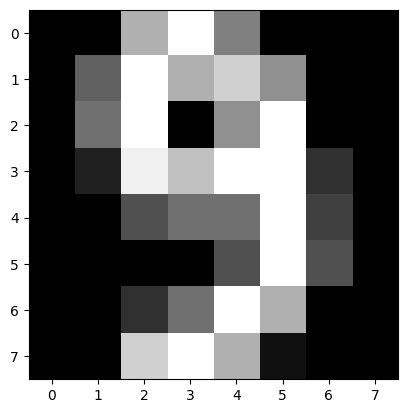

In [52]:
# Visualizing some digits
sample = np.random.randint(0, len(x))
img = x[sample].reshape((8,8)).astype(np.uint8)

imgplot = plt.imshow(img, cmap="gray")
plt.show()

In [53]:
# Spliting the data into train and test sets, passing the test size of 20% and
# random_state to make sure we have the same result if we run this cell again

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Before trainning the mode, we have to normalize the values

- Transform the features to have mean = zero and SD = 1

- Steps to normalization:
   1)  Calculate mean and SD for each column of x (feature)
   2)  Substract each feature's value from the mean of its column
   3)  Divide by the SD os the column.

### This is easily made by: sklearn.preprocessing.StandardScaler:


In [54]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [55]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

# Normalizing:
x_test = scaler.transform(x_test)

# Predicting:
y_pred = model.predict(x_test)

In [56]:
print('Accuracy (TRAINING SET) = ',model.score(x_train, y_train))
print('Accuracy (TEST SET)     = ',model.score(x_test, y_test))

Accuracy (TRAINING SET) =  0.964509394572025
Accuracy (TEST SET)     =  0.9416666666666667


## Accuracy Training set **>** accuracy test set
- makes sense, since the model was trained with the training set, the accuracy is also higher

## Plotting the confusion matrix

In [57]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]])

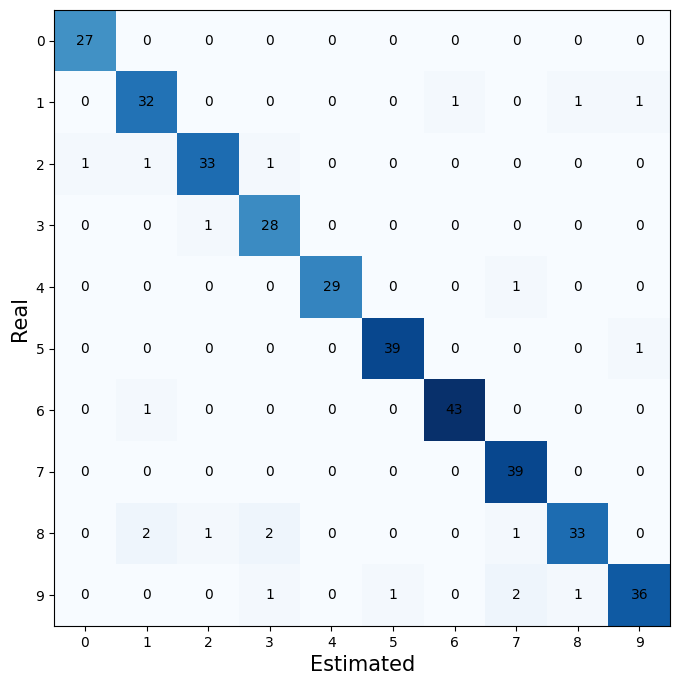

In [58]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.set_xlabel('Estimated', fontsize=15, color='black')
ax.set_ylabel('Real', fontsize=15, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

# Conclusion:
- Looking at the confusion matrix, we can see that the number "8" was confused by the numbers "1" and "3", twice, and by the numbers "2" and "7", once.
- that analysis can be done for each number; so the confusion matrix is a very good way os 

## Reference
https://realpython.com/logistic-regression-python/